## Exercicio 10 
Ana Moreira \
Damião Goes

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

In [ ]:
df = df.dropna()
df.head(10)

#### Seleção das variáveis quantitativas, dos sites Douro e Tejo e standardização 

In [18]:
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
data_sites = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

In [19]:
# Standardização das variaveis 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_sites[variables])

#### PCA e PCA Biplot

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Catchment_name'] = data_sites['Catchment_name'].values

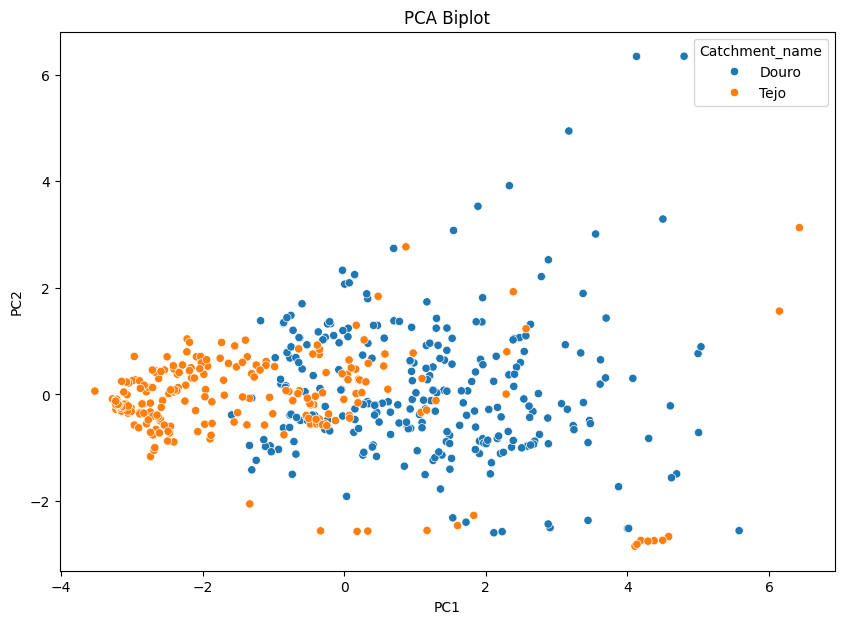

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Catchment_name')
plt.title('PCA Biplot')
plt.show()

##### A sobreposição no centro indica que ambos os rios possuem características ambientais semelhantes, ao afastar do centro denota-se ainda assim a especificidade de cada bacia hidrográfica.

#### PCoA e PCoA Biplot

In [14]:
# PCoA
from sklearn.manifold import MDS


mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
mds_components = mds.fit_transform(scaled_data)
mds_df = pd.DataFrame(data=mds_components, columns=['MDS1', 'MDS2'])
mds_df['Catchment_name'] = data_sites['Catchment_name'].values

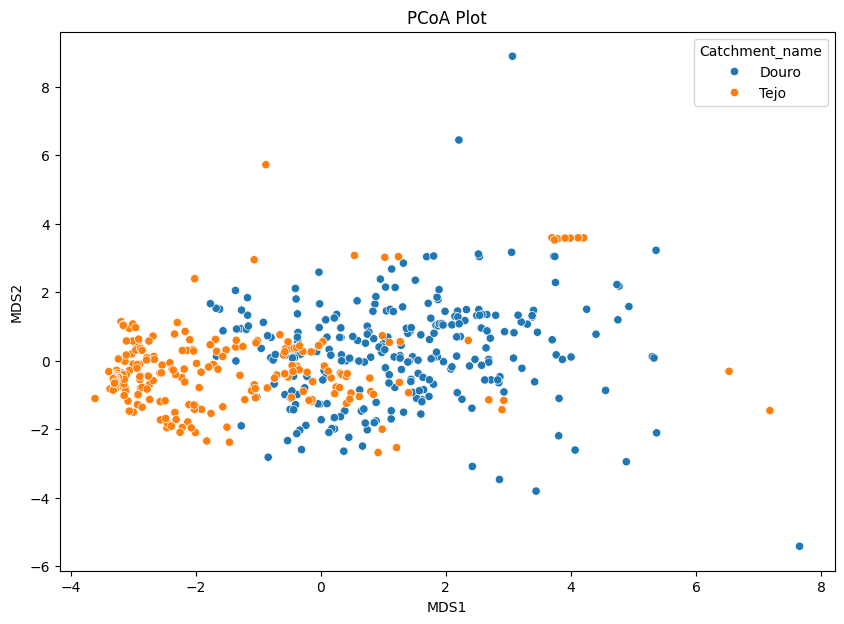

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=mds_df, x='MDS1', y='MDS2', hue='Catchment_name')
plt.title('PCoA Plot')
plt.show()


##### Tal como no biplot anterior a sobreposição ao centro significa características ambientais semelhnates em ambos os rios, porém os clusters distintos destacam o que podem ser características únicas dentro de cada uma das bacias hidrográficas.

#### LDA e LDA Bipolt

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_components = lda.fit_transform(scaled_data, data_sites['Catchment_name'])
lda_df = pd.DataFrame(data=lda_components, columns=['LD1'])
lda_df['Catchment_name'] = data_sites['Catchment_name'].values

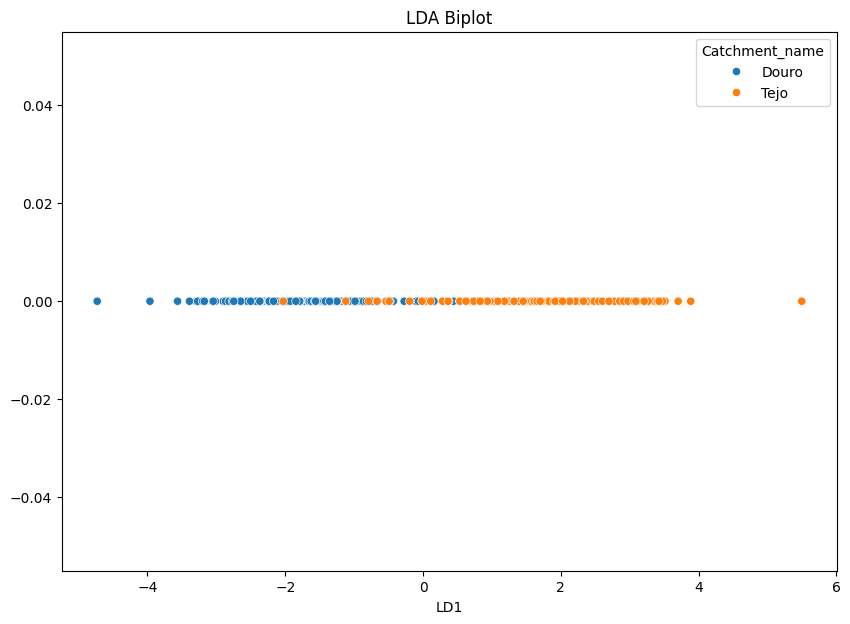

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=lda_df, x='LD1', y=[0]*len(lda_df), hue='Catchment_name')
plt.title('LDA Biplot')
plt.show()

##### Através do resultados demonstrados no biplot do LDA, podemos observar a separação entre os dois sites, pelo que se evidênciam diferenças entre os rios Douro e Tejo, ainda assim a sobreposiçãoa ao centro demosntra que esta separação baseada nas variáveis quantitativas não é suficietemente forte para só por si retirar conclusões.